In [1]:
from pneumonia_dnn.dataset import create_update_dataset_from_metadata, DatasetClassifier
from pneumonia_dnn.project import create_project
import shutil
from pneumonia_dnn.project import apply_augmentations
from pneumonia_dnn.models.cnn import run_cnn
import matplotlib.pyplot as plt
from keras import backend
from pneumonia_dnn.models.vit import run_vit

def plot_history(history, item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


2024-04-09 02:37:32.924254: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-09 02:37:32.970894: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 02:37:32.970929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 02:37:32.972194: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-09 02:37:32.979881: I tensorflow/core/platform/cpu_feature_guar

In [2]:
shutil.rmtree("datasets", ignore_errors=True)

# Initialize our dataset with the data from Coronahack-chest-xray dataset
# source: https://www.kaggle.com/datasets/praveengovi/coronahack-chest-xraydataset
create_update_dataset_from_metadata(
                        "pneumonia",
                        "praveengovi/coronahack-chest-xraydataset",
                        "Chest_xray_Corona_Metadata.csv",
                        label_column="Label",
                        labels=[
                            DatasetClassifier("pneumonia", "Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset", "Pnemonia", True),
                            DatasetClassifier("nonpneumonia",  "Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset", "Normal", True)
                        ],
                        image_column="X_ray_image_name",
                        folder_column="Dataset_type",
                        folder_to_lower=True,
                        download_path="downloads",
                        dataset_path="datasets" )

# Add additional data from the Sampl NIH Dataset
# source: https://www.kaggle.com/datasets/nih-chest-xrays/sample
# Note: By using the same name it updates the
create_update_dataset_from_metadata(
                        "pneumonia",
                        "sample",
                        "sample_labels.csv",
                        label_column="Finding Labels",
                        labels=[
                            DatasetClassifier("pneumonia", "sample/images", "Pneumonia", True),
                            DatasetClassifier("nonpneumonia",  "sample/images", "Pneumonia", False)
                        ],
                        image_column="Image Index",
                        folder_column=None,
                        folder_to_lower=True,
                        download_path="downloads",
                        dataset_path="datasets" )

/home/ubuntu/workspace/Pneumonia-DNN/pneumonia_dnn/dataset.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df[image_column] = (
/home/ubuntu/workspace/Pneumonia-DNN/pneumonia_dnn/dataset.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df[image_column] = (


In [3]:
shutil.rmtree("projects/first_project", ignore_errors=True)
create_project("first_project", "pneumonia", 224, 224, 3, None, 0.7, 8600, None)

Processing test for label nonpneumonia: 100%|██████████| 1290/1290 [00:01<00:00, 661.03it/s]


In [4]:
apply_augmentations("first_project", 0.2, 0.2, True, True, 0.02)

Found 6020 files belonging to 2 classes.


2024-04-09 02:37:44.113042: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-09 02:37:44.162280: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-09 02:37:44.165173: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 2580 files belonging to 2 classes.
Epoch 1/25


2024-04-09 02:37:48.600673: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-04-09 02:37:50.374042: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2248f8b900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-09 02:37:50.374074: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-04-09 02:37:50.379530: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1712630270.449172   10512 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 2/25
Epoch 3/25
Epoch 4/25
Epoch 5/25
Epoch 6/25
Epoch 7/25
Epoch 8/25
Epoch 9/25
Epoch 10/25
Epoch 11/25
Epoch 12/25
Epoch 13/25
Epoch 14/25
Epoch 15/25
Epoch 16/25
Epoch 17/25
Epoch 18/25
Epoch 19/25
Epoch 20/25
Epoch 21/25
Epoch 22/25
Epoch 23/25
Epoch 24/25
Epoch 25/25


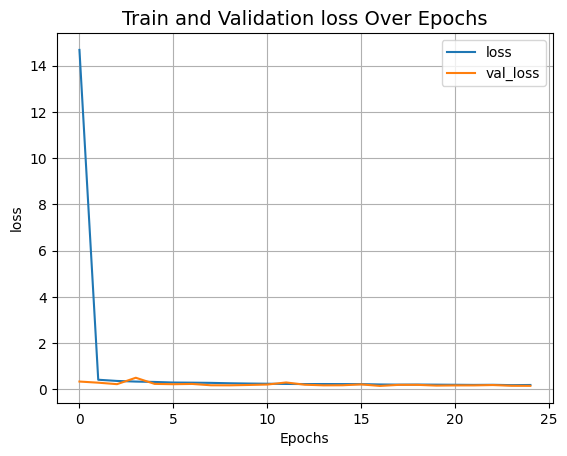

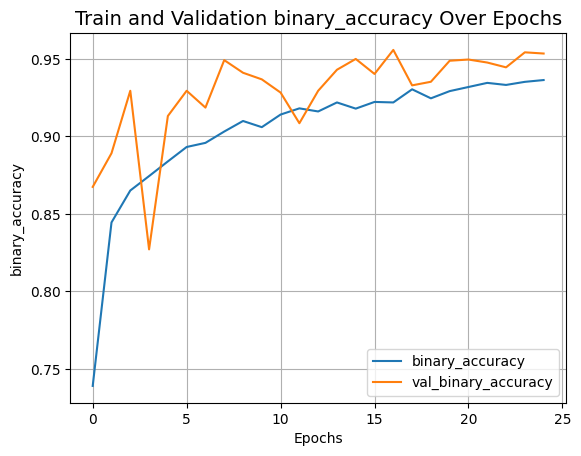

In [5]:
cnn_history = run_cnn("first_project")
plot_history(cnn_history, "loss")
plot_history(cnn_history, "binary_accuracy")
backend.clear_session()

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


2024-04-09 02:45:17.496611: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


Found 6020 files belonging to 2 classes.
Found 2580 files belonging to 2 classes.
Epoch 1/25
189/189 [==============================] - 62s 254ms/step - loss: 6.0683 - binary_accuracy: 0.5610 - val_loss: 0.5988 - val_binary_accuracy: 0.6802
Epoch 2/25
189/189 [==============================] - 48s 252ms/step - loss: 0.6462 - binary_accuracy: 0.6314 - val_loss: 0.4951 - val_binary_accuracy: 0.8353
Epoch 3/25
189/189 [==============================] - 48s 251ms/step - loss: 0.6306 - binary_accuracy: 0.6367 - val_loss: 0.5583 - val_binary_accuracy: 0.6767
Epoch 4/25
189/189 [==============================] - 48s 252ms/step - loss: 0.5942 - binary_accuracy: 0.6759 - val_loss: 0.4679 - val_binary_accuracy: 0.8368
Epoch 5/25
189/189 [==============================] - 48s 252ms/step - loss: 0.5738 - binary_accuracy: 0.7125 - val_loss: 0.4505 - val_binary_accuracy: 0.8364
Epoch 6/25
189/189 [==============================] - 48s 252ms/step - loss: 0.5195 - binary_accuracy: 0.7571 - val_loss: 0

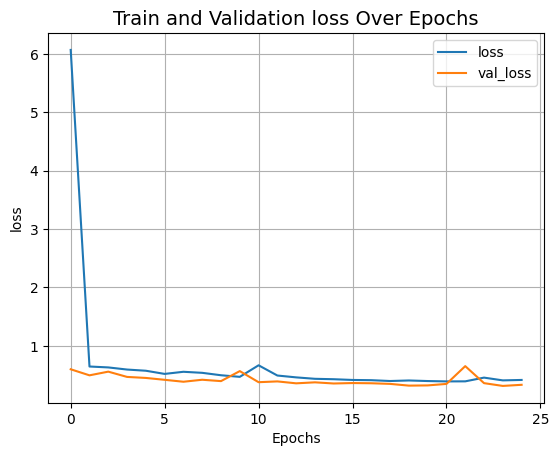

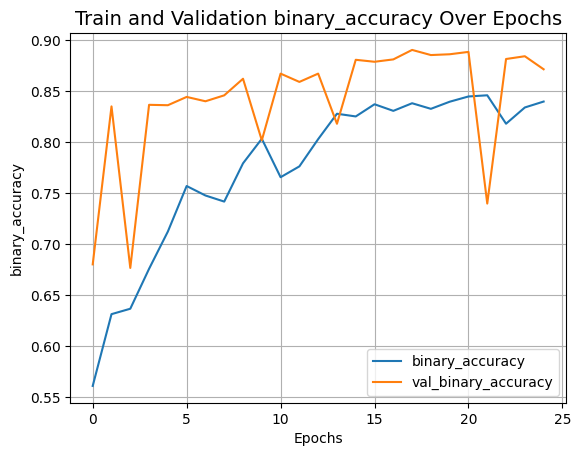

In [6]:
vit_history = run_vit("first_project")

plot_history(vit_history, "loss")
plot_history(vit_history, "binary_accuracy")
backend.clear_session()